<a href="https://colab.research.google.com/github/Tavares2020/Tavares2020/blob/main/05_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FICO Analytic Challenge © Fair Isaac 2025**

# Week 5 - Logistic Regression - Model training and evaluation

## Logistic Regression

Logistic regression is a Machine Learning algorithm used primarily for binary classification problems, where the outcome can take one of two possible values. The goal is to predict the probability that the outcome belongs to a given class or not based on information from predictor variables.

Few examples of binary classification problems -
1. Spam Detection: To predict if an email is spam or not spam
2. Medical Diagnosis: To predict if a tumor is malignant or not
3. Marketing: To predict if a customer will buy a product or not
4. **Credit Scoring**: To predict if a customer will default on a loan or not
5. **Fraud Detection**: To identify if a transaction is fraud or not



<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-11-51-17.png width = "800" style="margin:50px 0px 50px 0px">

<img src = https://www.saedsayad.com/images/LogReg_1.png width = "1000" style="margin:50px 0px 50px 0px">

**Sigmoid function:** The S-shaped curve used to predict probabilities. It's value is always between 0 and 1. <br>
<img src = https://editor.analyticsvidhya.com/uploads/642295.png style="margin:0px 50px 20px 250px">

<img src = https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-05-10-58-02.png width = "800" style="margin:50px 0px 50px 0px">

**Resources:**

https://www.kdnuggets.com/2020/03/linear-logistic-regression-explained.html

https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/

https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

## **Contents**

**1. Load Dataset**

    1.1 Load Train and Test datasets and combine them to create overall dataset
    1.2 Transaction filtering
    1.3 Create Features dataset and Target data

**2. Modelling Data Preparation**

    2.1 Summary Statistics
    2.2 Missing value analysis
    2.3 Normalization of the features
    2.4 Create train and test datasets
    
**3. Model Training**

    3.1 Training Logistic Regression Model
    3.2 Forward Selection of features
    3.3 Backward Elimination of features

## **1. Load Dataset**


In [ ]:
## Mount the drive and add the directory paths

import os
import sys
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Base path for your project
path = '/content/drive/MyDrive/FICO Analytic Challenge'

# Folder that's holding dataset
data = 'Data'

# Model Folder's name
modelFolder='Model'

# Model's prefix name; Used to distinguish model's output files
model='LogReg'

# Path to the "Data" and "Model" folder
data_path = os.path.join(path, data)
model_path = os.path.join(path, modelFolder)

# Path to location where trained model will be saved. Create the directory if it doesn't exist
os.makedirs(model_path, exist_ok = True)

# scale file path
scaleFilePrefix='scaler'
scaleFile = os.path.join(model_path, scaleFilePrefix + '.' + model + '.' + data + ".pkl")
scaleFileFeatures = os.path.join(model_path, scaleFilePrefix + '.' + model + '.' + data + '.features' + ".txt")

# Subdirectories to include in sys.path
subdirectories = [data, 'DNU_Functions', modelFolder] + [f'Week_{str(i).zfill(2)}' for i in range(12)]

# Add each subdirectory to sys.path
for subdir in subdirectories:
    sys.path.append(os.path.join(path, subdir))

# Change working directory to the base path
os.chdir(path)
print(os.getcwd())

ValueError: mount failed

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
## import libraries required in this notebook
import pandas as pd
import numpy as np
import seaborn as sns
from pickle import dump, load
from fico_functions import *
from IPython.display import display, Math, Latex, Image

# import Logistic Regression and Feature Selection libraries
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector

# Sci-kit learn libraries
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Plotting library
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

# Removing limitation in viewing pandas columns and rows
pd.set_option('display.max_columns', None, 'display.max_rows', None)

In [ ]:
## Setting up dataset paths

# dataset file prefix
trainFile = ['train']
testFile = ['test_A']

# Set to "True" if importing base dataset; default is False
base=False

# Set to "True" if creating advanced features; default is False
creatingAdvancedFeatures=False

# Set to "True" if using advanced features, "False" if using regular features and not base; default is False
usingAdvancedFeatures=False

# CSV filename and where outputs will be saved
trainCSV, trainsaveCSV, featureTrainFileSuffix = featuresFileSuffix(data_path, trainFile, creatingAdvancedFeatures, usingAdvancedFeatures, base=base, model=model, scaleFilePrefix=scaleFilePrefix)
testCSV, testsaveCSV, featureTestFileSuffix = featuresFileSuffix(data_path, testFile, creatingAdvancedFeatures, usingAdvancedFeatures, base=base, model=model, scaleFilePrefix=scaleFilePrefix)

Using train_features.csv to train model and/or produce scoreouts and perf metrics
File 1: /content/drive/MyDrive/FICO Analytic Challenge/Data/train_features.csv
File 2: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.LogReg.train_features.scaler.csv

Using test_A_features.csv to train model and/or produce scoreouts and perf metrics
File 1: /content/drive/MyDrive/FICO Analytic Challenge/Data/test_A_features.csv
File 2: /content/drive/MyDrive/FICO Analytic Challenge/Data/score.LogReg.test_A_features.scaler.csv



### **1.1 Load Train and Test datasets and combine them to create overall dataset**

In [ ]:
# Read the train dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows
df_train_features = import_df(trainCSV)
print(df_train_features.shape)
df_train_features.head()

(1050475, 39)


,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,is_CNP,amt_trend_5e,deltaTime,repeat_amt,is_late_night,user_avg_amount,is_international,IsHighValue,amt_trend_24h,RelativeAmount,transactionHour,count_trend_1h,IS_0_TO_5AM
0,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:27:52,1,US,Missouri,US,Missouri,0,1338.570000,0.0,0,0,1338.570000,0,1,1338.570000,1.000000,15,1.0,0
1,T001028354037962B,Zboncak LLC,shopping_pos,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:41:52,1,US,Missouri,US,Missouri,0,1264.205000,840.0,0,0,1338.570000,0,1,1264.205000,0.888889,15,2.0,0
2,T001028354037962B,Zboncak LLC,misc_pos,743.65,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:55:52,1,US,Missouri,US,Missouri,0,1090.686667,840.0,0,0,1264.205000,0,1,1090.686667,0.588235,15,3.0,0
3,T001028354037962B,Zboncak LLC,grocery_pos,1338.57,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:09:52,1,US,Missouri,US,Missouri,0,1152.657500,840.0,0,0,1090.686667,0,1,1152.657500,1.227273,16,4.0,0
4,T001028354037962B,Zboncak LLC,food_dining,1189.84,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:23:52,1,US,Missouri,US,Missouri,0,1160.094000,840.0,0,0,1152.657500,0,1,1160.094000,1.032258,16,5.0,0


In [ ]:
# Read the test dataset, print the dimensions (#rows x #columns) of the dataset and view the first 5 rows
df_test_features = import_df(testCSV)
print(df_test_features.shape)
df_test_features.head()

(561005, 39)


,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,is_CNP,amt_trend_5e,deltaTime,repeat_amt,is_late_night,user_avg_amount,is_international,IsHighValue,amt_trend_24h,RelativeAmount,transactionHour,count_trend_1h,IS_0_TO_5AM
0,A001028354037962B,"Bins, Balistreri and Beatty",shopping_pos,3.19,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,20c1cf41b472000887395508c5796354,1325386894,39.299707,-95.975808,0,1,2020-02-01 00:01:34,0,US,Kansas,US,Missouri,0,3.190,0.0,0,1,3.190,0,0,3.190,1.000000,0,1.0,1
1,A001028354037962B,Terry-Huel,shopping_net,9.52,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,771a63aaf5210acfbf5ac2403aad30af,1325390918,39.790646,-95.043146,0,1,2020-02-01 00:08:38,0,US,Kansas,US,Missouri,1,6.355,424.0,0,1,3.190,0,0,6.355,2.984326,0,2.0,1
2,A001028354037962B,Johnston-Casper,travel,7.33,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,7a30020f6af806a03b3e3b859b9a2df4,1325424070,40.977943,-96.135389,0,1,2020-02-01 00:21:10,0,US,Nebraska,US,Missouri,0,6.680,752.0,0,1,6.355,0,0,6.680,1.153423,0,3.0,1
3,A001028354037962B,Prohaska-Murray,gas_transport,46.66,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,b8e3100c6bccb605dd98a848e2c76eda,1325396176,41.071606,-94.999602,0,1,2020-02-01 00:36:16,0,US,Iowa,US,Missouri,0,16.675,906.0,0,1,6.680,0,0,16.675,6.985030,0,4.0,1
4,A001028354037962B,Hudson-Ratke,grocery_pos,84.04,Melody,Thompson,F,0362 Anderson Wall,64470,40.1362,-95.2138,1631,Architect,1953-01-20,a4124a63fe29428a307eb671a3f03ba3,1325407994,40.638122,-95.834340,0,1,2020-02-01 00:53:14,0,US,Nebraska,US,Missouri,0,30.148,1018.0,0,1,16.675,0,0,30.148,5.039880,0,5.0,1


In [ ]:
dataset_count(df_train_features, df_isTrain=True)

Train Set
# of Unique PANs = 1042
# of NF and F Accounts = 1042
# of Non-Fraud Accounts = 411
# of Fraud Accounts = 631
----------
# of Transactions = 1050475
# of Non-Fraud Transactions = 1043500
# of Fraud Transactions = 6975
----------
Account Level Fraud Rate = 0.6056
Transaction level Fraud Rate = 0.0066
# of Fraud Transactions / # of Fraud Accounts = 11.0539


In [ ]:
dataset_count(df_test_features, df_isTrain=False)

Test Set
# of Unique PANs = 510
# of NF and F Accounts = 510
# of Non-Fraud Accounts = 244
# of Fraud Accounts = 266
----------
# of Transactions = 561005
# of Non-Fraud Transactions = 558481
# of Fraud Transactions = 2524
----------
Account Level Fraud Rate = 0.5216
Transaction level Fraud Rate = 0.0045
# of Fraud Transactions / # of Fraud Accounts = 9.4887


In [ ]:
# Combine train and test datasets for feature analysis and further processing
df = pd.concat([df_train_features, df_test_features], ignore_index=True, axis=0)
df.shape

(1611480, 39)

In [ ]:
dataset_count(df, df_isTrain=None)

Combined Train and Test Sets
# of Unique PANs = 1552
# of NF and F Accounts = 1552
# of Non-Fraud Accounts = 655
# of Fraud Accounts = 897
----------
# of Transactions = 1611480
# of Non-Fraud Transactions = 1601981
# of Fraud Transactions = 9499
----------
Account Level Fraud Rate = 0.5780
Transaction level Fraud Rate = 0.0059
# of Fraud Transactions / # of Fraud Accounts = 10.5897


### **1.2 Transaction filtering**

The following transactions needs to be excluded from modelling data.
 - All the non-fraud transactions corresponding to a fraud account are excluded from the model training
 - Transactions which are in the first two months to allow for profile maturation

#### Removing Non-fraud transactions from Fraud accounts
A fraud account can have fraud transactions and non-fraud transactions. To avoid any uncertainty of these non-fraud transactions being fraud or not, we remove all non-fraud transactions of a fraud account from modelling data.

In [ ]:
# Generate cross-frequency of mdlIsFraudAcct and mdlIsFraudTrx
pd.crosstab(df['mdlIsFraudAcct'], df['mdlIsFraudTrx'])

mdlIsFraudTrx,0,1
mdlIsFraudAcct,,
0,817483,0
1,784498,9499


In [ ]:
# Remove Non-Fraud Transactions from Fraud Accounts
df = filterNFTrxfromFAccn(df)

In [ ]:
dataset_count(df, df_isTrain=None)

Combined Train and Test Sets
# of Unique PANs = 1531
# of NF and F Accounts = 1531
# of Non-Fraud Accounts = 655
# of Fraud Accounts = 876
----------
# of Transactions = 826982
# of Non-Fraud Transactions = 817483
# of Fraud Transactions = 9499
----------
Account Level Fraud Rate = 0.5722
Transaction level Fraud Rate = 0.0115
# of Fraud Transactions / # of Fraud Accounts = 10.8436


#### Removing first two months transactions to allow for profile maturation
Since some of our profile variables depend on potentially long periods of time, we would like to allow those features to fully build up to their entire calculation window. Ideally, we would have several months before the training period to allow for these features to mature, but since we only have a year's worth of data, we will restrict ourselves to a maximum of 2 month window, allowing our data to train on the remaining 10 months of data. These initial 2 months are known as the ‘profile maturation period’, where these profile variables properly develop. We exclude the transactions from the first 2 months from the modelling data to allow for profile maturation.

In [ ]:
# Remove the transactions from first two months
df = matureProf_n_months(df, 'transactionDateTime', ['pan','transactionDateTime'], n_months=2)

Earliest date:  2020-01-01 00:00:02
Cutoff date:    2020-03-01 00:00:02


In [ ]:
dataset_count(df, df_isTrain=None)

Combined Train and Test Sets
# of Unique PANs = 1422
# of NF and F Accounts = 1422
# of Non-Fraud Accounts = 655
# of Fraud Accounts = 767
----------
# of Transactions = 710100
# of Non-Fraud Transactions = 701729
# of Fraud Transactions = 8371
----------
Account Level Fraud Rate = 0.5394
Transaction level Fraud Rate = 0.0118
# of Fraud Transactions / # of Fraud Accounts = 10.9140


### **1.3 Create Features dataset and Target data**

**Features** - Features are also known as predictors, independent variables, or input variables. These are the attributes of the data that are used to make predictions. They are the inputs to the model. Features are derived from information available at the time of prediction. Features are generally represented by X.

**Target** - Target is also known as the response, dependent variable, or output variable. It is the value or label that the model is trying to predict. It is the output of the model. Target is generally represented by y.

In [ ]:
# Columns that are in the dataframe that aren't inputs to the model, aside from the the columns dropped when importing the dataset
feature_columns, label_column, base_cols = get_feature_cols(df, trainFile)

Columns in: train
Number of Columns in Base: 27
Base Columns: ['deltaTime', 'dob', 'gender', 'job', 'trans_num', 'merch_long', 'lat', 'cardholderState', 'merch_lat', 'transactionDateTime', 'pan', 'category', 'unix_time', 'street', 'last', 'cardholderCountry', 'mdlIsFraudTrx', 'zip', 'long', 'merchState', 'transactionAmount', 'merchant', 'is_train', 'mdlIsFraudAcct', 'first', 'city_pop', 'merchCountry']
Number of Features: 12
Input Features: ['IS_0_TO_5AM', 'IsHighValue', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'count_trend_1h', 'is_CNP', 'is_international', 'is_late_night', 'repeat_amt', 'transactionHour', 'user_avg_amount']
Label Column: ['mdlIsFraudTrx']



In [ ]:
## If any intermediate columns are created to generate final features, these intermediate variables need to be removed from the feature_columns

# Add the columns you want to remove from features to the list below
columnsToRemove = ['transactionHour']

feature_columns_original = feature_columns.copy()
for col in columnsToRemove:
  feature_columns.remove(col)
print(f"Final Number of Features: {len(feature_columns)}")
print(f"Final Features: {feature_columns}")

Final Number of Features: 11
Final Features: ['IS_0_TO_5AM', 'IsHighValue', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'count_trend_1h', 'is_CNP', 'is_international', 'is_late_night', 'repeat_amt', 'user_avg_amount']


In [ ]:
# Assign all predictor variables (features) to X and target variable to y
X = df[feature_columns].copy()
print(X.shape)
y = df[label_column]

(710100, 11)


In [ ]:
# Analyze distribution of target variable
y.value_counts(dropna = False)

,count
mdlIsFraudTrx,
0,701729
1,8371


In [ ]:
# Analyze distribution of target variable as percentage - Fraud rate
y.value_counts(dropna = False, normalize = True)

,proportion
mdlIsFraudTrx,
0,0.988212
1,0.011788


## **2. Modelling data preparation**

### **2.1 Summary Statistics**

Analyze the univariate statistics like min, max, median, percentile distribution etc for all the predictive features

In [ ]:
print("Summary Statistics")
summary_statistics = X.describe().T
summary_statistics

Summary Statistics


,count,mean,std,min,25%,50%,75%,max
IS_0_TO_5AM,710100.0,0.034070,0.181409,0.000000,0.000000,0.000000,0.000000,1.000000
IsHighValue,710100.0,0.214295,0.410333,0.000000,0.000000,0.000000,0.000000,1.000000
RelativeAmount,710100.0,1.072449,2.675206,0.001604,0.157765,0.682232,1.265808,502.185580
amt_trend_24h,710100.0,98.477477,207.668719,1.000000,38.932500,58.690000,87.094405,35738.610000
amt_trend_5e,710100.0,98.478629,189.183570,1.060000,38.394000,58.070000,86.882000,25755.742000
count_trend_1h,710100.0,3.590228,2.948423,1.000000,1.000000,3.000000,5.000000,36.000000
is_CNP,710100.0,0.161700,0.368175,0.000000,0.000000,0.000000,0.000000,1.000000
is_international,710100.0,0.022181,0.147273,0.000000,0.000000,0.000000,0.000000,1.000000
is_late_night,710100.0,0.071410,0.257508,0.000000,0.000000,0.000000,0.000000,1.000000
repeat_amt,710100.0,0.001235,0.035121,0.000000,0.000000,0.000000,0.000000,1.000000


### **2.2 Missing value analysis**

There are various methods to handle missing data. For example,
- If the proportion of missing values in a column is beyond a tolerable limit, those columns can be excluded from the model
- If the missing values of a column are within tolerable limit, they are imputed with median or mean value of the column

**isna()** is used to identify missing values in the dataset. It returns boolean values - 'True' indicates missing value, 'Flase' indicates non-missing values<br>
**fillna()** is used to replace missing/null values with a specified value

In [ ]:
# Calculate the proportion of missing values in each column
X.isna().mean()

,0
IS_0_TO_5AM,0.0
IsHighValue,0.0
RelativeAmount,0.0
amt_trend_24h,0.0
amt_trend_5e,0.0
count_trend_1h,0.0
is_CNP,0.0
is_international,0.0
is_late_night,0.0
repeat_amt,0.0


In [ ]:
# Remove columns with high missing values beyond a threshold
# Threshold value can be changed
threshold_missing = 0.2

X = X.loc[:, X.isna().mean() < threshold_missing]
X.shape

(710100, 11)

In [ ]:
## Impute missings with median value for variables below missing threshold
print(X.median())
X = X.fillna(X.median())

IS_0_TO_5AM          0.000000
IsHighValue          0.000000
RelativeAmount       0.682232
amt_trend_24h       58.690000
amt_trend_5e        58.070000
count_trend_1h       3.000000
is_CNP               0.000000
is_international     0.000000
is_late_night        0.000000
repeat_amt           0.000000
user_avg_amount     63.252712
dtype: float64


### **2.3 Normalization of the features**

Normalization is done to transform the freatures to a same scale. This helps in stable model training and easy interpretability of feature importance.

There are different ways to normalize data. More details on why normalization is required and different ways to normalize the data can be found here -
https://www.datacamp.com/tutorial/normalization-in-machine-learning

**StandardScaler** function from sklean is used to normalize the features. It uses below formula to normalize the features.

x_transform = (x-mean)/standard deviation

In [ ]:
scaler = StandardScaler()
X_transform = pd.DataFrame(scaler.fit_transform(X), columns = X.columns, index=X.index)
print(X_transform.shape)
X_transform.head()

(710100, 11)


,IS_0_TO_5AM,IsHighValue,RelativeAmount,amt_trend_24h,amt_trend_5e,count_trend_1h,is_CNP,is_international,is_late_night,repeat_amt,user_avg_amount
1053105,-0.187807,1.9148,3.494716,4.148834,0.890931,-0.878514,2.276906,-0.150614,3.606065,-0.035165,-0.020893
1053106,-0.187807,1.9148,3.308611,4.056283,1.803611,-0.539349,2.276906,-0.150614,3.606065,-0.035165,-0.014167
1053107,-0.187807,1.9148,0.882994,3.062055,2.008946,-0.200184,-0.439192,-0.150614,3.606065,-0.035165,-0.007750
1053108,-0.187807,1.9148,3.775284,3.439290,3.007480,0.138980,2.276906,-0.150614,3.606065,-0.035165,-0.005987
1053109,-0.187807,1.9148,3.621205,3.508921,3.992259,-0.878514,2.276906,-0.150614,3.606065,-0.035165,0.001386


In [ ]:
# Save the scaling parameters
dump(scaler, open(scaleFile, 'wb'))

# Write each feature to file
with open(scaleFileFeatures, 'w') as file:
    for feature in X.columns:
        file.write(f"{feature}\n")

### **2.4 Create train and test datasets**

Train dataset is used to **train the model** and test dataset is used to **evaluate the model** performance. The train and test datasets are chosen randomly so that both datasets represents the  distributions in overall data. Having a test data independent of the train data to evaluate the model also reduces risk of over-fitting of the model.

https://www.geeksforgeeks.org/training-data-vs-testing-data/

For the purpose of fraud modelling, we need to make sure that all the transactions corresponding to an account (pan id) are part of either train data or test data. Otherwise, there will be profile leaks if transactions from same account are included in both train and test datasets. In that case test data cannot be considered as independent of train data for the sake of evaluation

**GroupShuffleSplit** function from sklearn is used to create train and test datasets while ensuring that the accounts from same group (pan) fall into either train or test data

In [ ]:
# from sklearn.model_selection import GroupShuffleSplit

# gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=100)

# for train_idx, test_idx in gss.split(X_filtered, y_filtered, groups=df_filtered['pan']):
#     # splitting features dataset and target dataset into train and test
#     X_train, X_test = X_filtered.iloc[train_idx], X_filtered.iloc[test_idx]
#     y_train, y_test = y_filtered.iloc[train_idx], y_filtered.iloc[test_idx]

#     # splitting the filtered dataset
#     df_train, df_test = df_filtered.iloc[train_idx], df_filtered.iloc[test_idx]

In [ ]:
# Use is_train field to split the data into train and test samples

# Create boolean variables for train and test
train_bool = (df['is_train']==1)
test_bool = (df['is_train']==0)

# Use the boolean variable to create train data
X_train = X_transform.loc[train_bool]
y_train = y.loc[train_bool]
df_train = df.loc[train_bool]

# Use the boolean variable to create test data
X_test = X_transform.loc[test_bool]
y_test = y.loc[test_bool]
df_test = df.loc[test_bool]

In [ ]:
print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (447234, 11)
X_test : (262866, 11)
y_train : (447234, 1)
y_test : (262866, 1)


#### Analyze transaction level fraud rates in train and test

In [ ]:
print('Target rate (transaction fraud rate) in y_train : ', y_train.mean())
print('Target rate (transaction fraud rate) in y_test : ', y_test.mean())

Target rate (transaction fraud rate) in y_train :  mdlIsFraudTrx    0.013863
dtype: float64
Target rate (transaction fraud rate) in y_test :  mdlIsFraudTrx    0.008259
dtype: float64


#### Analyze CP vs CNP transaction level fraud rates in train and test

In [ ]:
pd.crosstab(df_train['is_CNP'], df_train['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx,0,1
is_CNP,,
0,0.989322,0.010678
1,0.969524,0.030476


In [ ]:
pd.crosstab(df_test['is_CNP'], df_test['mdlIsFraudTrx'], normalize = 'index')

mdlIsFraudTrx,0,1
is_CNP,,
0,0.993823,0.006177
1,0.981056,0.018944


#### Analyze account level fraud rates

In [ ]:
##-----Create account level train dataset-----------
# Number of unique pan ids in train datset
print('unique pan ids in train: ',df_train['pan'].nunique())

# Number of unique fraud pan ids in train datset
print('unique fraud pan ids in train: ',df_train[df_train['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for train by retaining unique pan ids
df_train_account = df_train[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level train dataset shape:', df_train_account.shape)

##-----Create account level test dataset-----------
# Number of unique pan ids in test datset
print('unique pan ids in test: ',df_test['pan'].nunique())

# Number of unique fraud pan ids in test datset
print('unique fraud pan ids in test: ',df_test[df_test['mdlIsFraudAcct']==1]['pan'].nunique())

# Create account level dataset for test by retaining unique pan ids
df_test_account = df_test[['pan','mdlIsFraudAcct']].sort_values(by = 'mdlIsFraudAcct',ascending = False).drop_duplicates('pan', keep = 'first')
print('Account level test dataset shape:', df_test_account.shape)

unique pan ids in train:  967
unique fraud pan ids in train:  556
Account level train dataset shape: (967, 2)
unique pan ids in test:  455
unique fraud pan ids in test:  211
Account level test dataset shape: (455, 2)


In [ ]:
print('Account level fraud rate in train: ', df_train_account['mdlIsFraudAcct'].mean())
print('Account level fraud rate in test: ', df_test_account['mdlIsFraudAcct'].mean())

Account level fraud rate in train:  0.5749741468459152
Account level fraud rate in test:  0.46373626373626375


## **3. Model Training**

### **3.1 Training Logistic Regression Model**

**LogisticRegression** function from sklearn in used to train a Log Reg model

More details on LogisticRegression can be found here - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
# initialize the model
LR = LogisticRegression(solver='liblinear', random_state=40, max_iter=500)

#Train the LR model using train data
LR.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=40, solver='liblinear')

#### Evaluating Feature Importance

Since the data is normalized, the coefficients of the features represent their importance. The **magnitudes of the coefficients** indicate the strength of the association with the target variable. The **sign of coefficient** indicates the direction of relationship between the feature and target. Positive sign indicates that if the feature value increases, the likelihood of positive class in target increases and vice-versa.

**coef_** function is used to fetch the coeffients of features in the model

In [ ]:
# Setting option to display numbers in float format
pd.options.display.float_format = '{:f}'.format

# Fetching coefficients
feature_coefficients = LR.coef_[0]

# Create a DataFrame to display feature importance
feature_names = X_train.columns
df_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficients': feature_coefficients
}).sort_values(by='Coefficients', ascending=False)

df_importance

,Feature,Coefficients
1,IsHighValue,0.909549
8,is_late_night,0.514131
0,IS_0_TO_5AM,0.340753
4,amt_trend_5e,0.329409
6,is_CNP,0.314484
9,repeat_amt,0.310212
7,is_international,0.162841
3,amt_trend_24h,0.149813
2,RelativeAmount,0.076265
5,count_trend_1h,0.001427


The features with highest magnitude of coefficient influence the predicted target the most. For features with sign of coefficient as negative, higher values are associated with negative outcome. Similarly, for features having sign of coefficient as positive, higher values are associated with positive outcome.

#### Generate predictions and convert to score
When the Logistic Regression model is applied on a transaction to make predictions, the output of the model gives is the probability of the transaction being Fraud or Non-Fraud. For operational purposes, these probabilities are converted to a score ranging from 1 - 999. High score indicates that the transaction has high probability of being a fraud and low score indicates low probability of transaction being a fraud. The following function uses the trained Logistic Regression model to generate probabilities on the transaction data and convert the probabilities to score.

<font color='red'>**Do not modify the function**</font>

In [ ]:
# generate predictions and scores
def scoring_predictions_logreg(X, LR):
    ##------- Generate predictions on the data ----#
    predictions = pd.Series(LR.predict_proba(X)[:,1])

    ##------ convert predictions to score ----#
    scaler = MinMaxScaler(feature_range=(1, 999))

    # Converting probabilites to logOdds to get a distribution about origin (0)
    log_odds = predictions.apply(lambda p: np.log(0.99999/(1-0.99999)) if p == 1 else (np.log(0.00001/(1-0.00001)) if p == 0 else np.log(p/(1-p))))
    score = pd.Series(scaler.fit_transform(log_odds.values[:, None]).astype(int).flatten())

    print("Y pred min = {}".format(predictions.min()))
    print("Y pred max = {}".format(predictions.max()))
    print("LogOdds min = {}".format(log_odds.min()))
    print("LogOdds max = {}".format(log_odds.max()))
    print("Score min = {}".format(score.min()))
    print("Score max = {}".format(score.max()))

    return score

In [ ]:
# generate scores on train dataset
score_train = scoring_predictions_logreg(X_train, LR)

Y pred min = 0.00011590368414403101
Y pred max = 1.0
LogOdds min = -9.062635110457126
LogOdds max = 29.721088149189747
Score min = 1
Score max = 998


In [ ]:
# generate scores on train dataset
score_test = scoring_predictions_logreg(X_test, LR)

Y pred min = 0.00014229869076632357
Y pred max = 1.0
LogOdds min = -8.857439944612361
LogOdds max = 34.2518939198891
Score min = 1
Score max = 999


#### Evaluating performance of the model on train and test datasets

The ROC-AUC metric (Receiver Operating Characteristic Area Under the Curve) is a performance metric used to evaluate the performance of binary classification models. It measures the ability of a model to distinguish between the positive and negative classes. Higher value indicates that the model is better at distinguishing the positive and negative classes.

ROC curve helps in visualizing the performance of the model. It helps us in understanding the fraud capture rates at different thresholds of non-frauds.

Detailed information on ROC-AUC can be found here - https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

**predict_proba** function is used to calculate the probability estimates for positive and negative classes <br>
**roc_auc_score** function is used to calculate the roc-auc metric. It takes actual values of the target and probability extimates of positive class as inputs to calculate roc-auc metric.

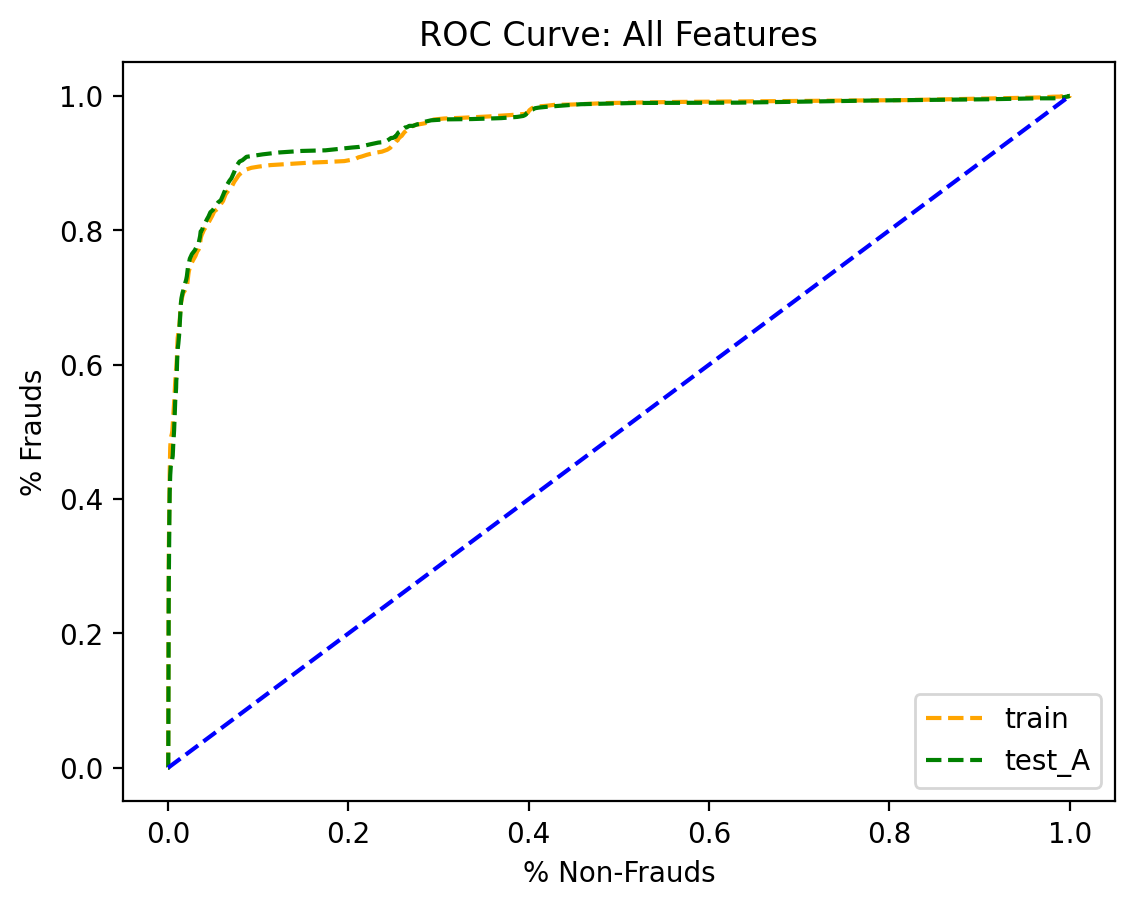

In [ ]:
# plotROC(y_train, score_train, y_test, score_test, model = 'All Features')
plotROC(y_train, score_train, y_test, score_test, trainFile, testFile, target_nonfraud_rate = None)

With a Non-Fraud Capture Rate of 0.005 (i.e., 0.50%), the Frauds we're capturing in the Train Data is = 50.548%
With a Non-Fraud Capture Rate of 0.005 (i.e., 0.50%), the Frauds we're capturing in the Test Data is  = 46.200%


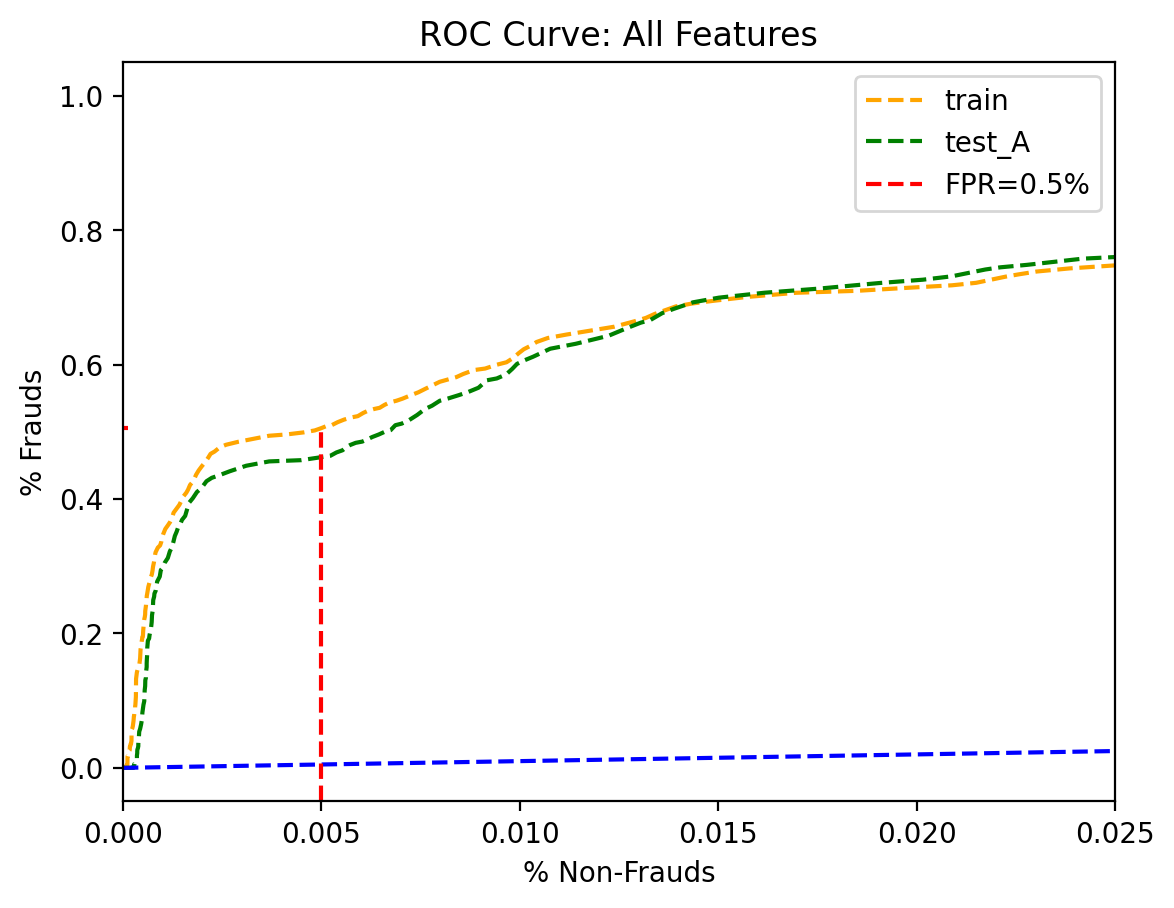

In [ ]:
# target_fraud_rate can be changed
plotROC(y_train, score_train, y_test, score_test, trainFile, testFile, target_nonfraud_rate = 0.005)

In [ ]:
# Train data performance
auc_train = roc_auc_score(y_train, score_train)
print("AUC value of the Model on train data : ", auc_train)

lauc_train = roc_auc_score(y_train, score_train, max_fpr=0.02)
print("LAUC value of the Model on train data : ", lauc_train)

AUC value of the Model on train data :  0.954138429931596
LAUC value of the Model on train data :  0.7902897114223062


In [ ]:
# Test data performance
auc_test = roc_auc_score(y_test, score_test)
print("AUC value of the Model on test data: ", auc_test)

lauc_test = roc_auc_score(y_test, score_test, max_fpr=0.02)
print("LAUC value of the Model on test data : ", lauc_test)

AUC value of the Model on test data:  0.9565376094155854
LAUC value of the Model on test data :  0.7803861838973387


#### Performance of Card Present and Card Not Present on test data

In [ ]:
# Card Present
auc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0])
print("AUC value of the Model on test data for Card Present Transactions: ", auc_test_CP)

lauc_test_CP = roc_auc_score(y_test[df_test['is_CNP']==0], score_test.values[df_test['is_CNP']==0], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Present Transactions: ", lauc_test_CP)

# Card not Present
auc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1])
print("AUC value of the Model on test data for Card Not Present Transactions: ", auc_test_CNP)

lauc_test_CNP = roc_auc_score(y_test[df_test['is_CNP']==1], score_test.values[df_test['is_CNP']==1], max_fpr=0.02)
print("LAUC value of the Model on test data for Card Not Present Transactions: ", lauc_test_CNP)

AUC value of the Model on test data for Card Present Transactions:  0.945919076398718
LAUC value of the Model on test data for Card Present Transactions:  0.7448086472004118
AUC value of the Model on test data for Card Not Present Transactions:  0.9774967504459643
LAUC value of the Model on test data for Card Not Present Transactions:  0.8294710459617674


#### Save the Logistic Regression Model

In [ ]:
modelFile = os.path.join(model_path, model + '.' + scaleFilePrefix + ".pkl")
dump(LR, open(modelFile, 'wb'))

#### Generate score on the whole dataset and save the scored out dataset

This dataset will be used as a input to perf_metrics notebook in week 7. To generate scores on entire dataset, we need to first scale the fratures using the scale file we saved earlier. We then need to pass the scaled features to the LR model to generate predictions and score.

In [ ]:
# load the scaler
scaler = load(open(scaleFile, 'rb'))

# Scale datasets
X_train_forScoreout = scaler.transform(df_train_features[feature_columns])
X_test_forScoreout = scaler.transform(df_test_features[feature_columns])

# Columns to save
saveColumns = [*base_cols, *feature_columns_original, *scoring_columns]
print(f"Columns to save: {saveColumns}")

Columns to save: ['deltaTime', 'dob', 'gender', 'job', 'trans_num', 'merch_long', 'lat', 'cardholderState', 'merch_lat', 'transactionDateTime', 'pan', 'category', 'unix_time', 'street', 'last', 'cardholderCountry', 'mdlIsFraudTrx', 'zip', 'long', 'merchState', 'transactionAmount', 'merchant', 'is_train', 'mdlIsFraudAcct', 'first', 'city_pop', 'merchCountry', 'IS_0_TO_5AM', 'IsHighValue', 'RelativeAmount', 'amt_trend_24h', 'amt_trend_5e', 'count_trend_1h', 'is_CNP', 'is_international', 'is_late_night', 'repeat_amt', 'transactionHour', 'user_avg_amount', 'y_preds', 'score']


In [ ]:
# generate probability predictions and score on train data and save the dataset
df_train_features['y_preds'] = pd.Series(LR.predict_proba(X_train_forScoreout)[:,1])
df_train_features['score'] = scoring_predictions_logreg(X_train_forScoreout, LR)
print("\n", df_train_features.shape)
display(df_train_features.head())

# Save the train dataset with predictions and score
df_train_features[saveColumns].to_csv(trainsaveCSV, index=False)

Y pred min = 5.7393198863666946e-05
Y pred max = 1.0
LogOdds min = -9.765527353508638
LogOdds max = 29.721088149189747
Score min = 1
Score max = 999

 (1050475, 41)


,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,is_CNP,amt_trend_5e,deltaTime,repeat_amt,is_late_night,user_avg_amount,is_international,IsHighValue,amt_trend_24h,RelativeAmount,transactionHour,count_trend_1h,IS_0_TO_5AM,y_preds,score
0,T001028354037962B,Zboncak LLC,grocery_pos,1338.570000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:27:52,1,US,Missouri,US,Missouri,0,1338.570000,0.000000,0,0,1338.570000,0,1,1338.570000,1.000000,15,1.000000,0,0.002699,98
1,T001028354037962B,Zboncak LLC,shopping_pos,1189.840000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:41:52,1,US,Missouri,US,Missouri,0,1264.205000,840.000000,0,0,1338.570000,0,1,1264.205000,0.888889,15,2.000000,0,0.002242,93
2,T001028354037962B,Zboncak LLC,misc_pos,743.650000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 15:55:52,1,US,Missouri,US,Missouri,0,1090.686667,840.000000,0,0,1264.205000,0,1,1090.686667,0.588235,15,3.000000,0,0.001878,89
3,T001028354037962B,Zboncak LLC,grocery_pos,1338.570000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:09:52,1,US,Missouri,US,Missouri,0,1152.657500,840.000000,0,0,1090.686667,0,1,1152.657500,1.227273,16,4.000000,0,0.004061,108
4,T001028354037962B,Zboncak LLC,food_dining,1189.840000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,6f65ed65d3f36366420fc82e4f0a499a,1345224472,40.199545,-95.393991,1,1,2020-09-17 16:23:52,1,US,Missouri,US,Missouri,0,1160.094000,840.000000,0,0,1152.657500,0,1,1160.094000,1.032258,16,5.000000,0,0.003322,103


In [ ]:
# generate probability predictions and score on test data and save the dataset
df_test_features['y_preds'] = pd.Series(LR.predict_proba(X_test_forScoreout)[:,1])
df_test_features['score'] = scoring_predictions_logreg(X_test_forScoreout, LR)
print("\n", df_test_features.shape)
display(df_test_features.head())

# Save the train dataset with predictions and score
df_test_features[saveColumns].to_csv(testsaveCSV, index=False)

Y pred min = 5.5559464595000845e-05
Y pred max = 1.0
LogOdds min = -9.798001115635547
LogOdds max = 34.2518939198891
Score min = 1
Score max = 999

 (561005, 41)


,pan,merchant,category,transactionAmount,first,last,gender,street,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,mdlIsFraudTrx,mdlIsFraudAcct,transactionDateTime,is_train,merchCountry,merchState,cardholderCountry,cardholderState,is_CNP,amt_trend_5e,deltaTime,repeat_amt,is_late_night,user_avg_amount,is_international,IsHighValue,amt_trend_24h,RelativeAmount,transactionHour,count_trend_1h,IS_0_TO_5AM,y_preds,score
0,A001028354037962B,"Bins, Balistreri and Beatty",shopping_pos,3.190000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,20c1cf41b472000887395508c5796354,1325386894,39.299707,-95.975808,0,1,2020-02-01 00:01:34,0,US,Kansas,US,Missouri,0,3.190000,0.000000,0,1,3.190000,0,0,3.190000,1.000000,0,1.000000,1,0.051683,157
1,A001028354037962B,Terry-Huel,shopping_net,9.520000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,771a63aaf5210acfbf5ac2403aad30af,1325390918,39.790646,-95.043146,0,1,2020-02-01 00:08:38,0,US,Kansas,US,Missouri,1,6.355000,424.000000,0,1,3.190000,0,0,6.355000,2.984326,0,2.000000,1,0.120200,177
2,A001028354037962B,Johnston-Casper,travel,7.330000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,7a30020f6af806a03b3e3b859b9a2df4,1325424070,40.977943,-96.135389,0,1,2020-02-01 00:21:10,0,US,Nebraska,US,Missouri,0,6.680000,752.000000,0,1,6.355000,0,0,6.680000,1.153423,0,3.000000,1,0.051828,157
3,A001028354037962B,Prohaska-Murray,gas_transport,46.660000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,b8e3100c6bccb605dd98a848e2c76eda,1325396176,41.071606,-94.999602,0,1,2020-02-01 00:36:16,0,US,Iowa,US,Missouri,0,16.675000,906.000000,0,1,6.680000,0,0,16.675000,6.985030,0,4.000000,1,0.062014,161
4,A001028354037962B,Hudson-Ratke,grocery_pos,84.040000,Melody,Thompson,F,0362 Anderson Wall,64470,40.136200,-95.213800,1631,Architect,1953-01-20,a4124a63fe29428a307eb671a3f03ba3,1325407994,40.638122,-95.834340,0,1,2020-02-01 00:53:14,0,US,Nebraska,US,Missouri,0,30.148000,1018.000000,0,1,16.675000,0,0,30.148000,5.039880,0,5.000000,1,0.058809,160


In [ ]:
assert False

AssertionError: 

### **3.2 Forward Selection of features**

<font color='red'>**Feature selection code takes more than 1 hour to run. The runtime increases as the number of input features increases.**</font>

Forward Selection is a type of feature selection technique that starts with an empty model and adds features one by one based on a specific criterion, typically the model's performance metric. The features are added until a stop criteria is met, like maximum number of features to add or no further imporvemnet in performance.

**SequentialFeatureSelector** function from mlxtend is used to add features in Forward selection or remove features in Backward elimination (discussed in next section).

More details on SequentialFeatureSelector can be found here - https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/#overview

In [ ]:
## initialize logistic regression model
LR_forward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [ ]:
# Number of features to select can be changed
num_features_to_select_forward = 10

sfs_forward = SequentialFeatureSelector(LR_forward, k_features=num_features_to_select_forward, scoring='roc_auc',forward=True, floating=False, cv=5)
sfs_forward.fit(X_train, y_train)

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

**k_feature_names_** gives list of final variables selected by SequentialFeatureSelector

In [ ]:
selected_features_forward = list(sfs_forward.k_feature_names_)
print(f"Selected features: {selected_features_forward}")

**get_metric_dict** provides summary of iterations

In [ ]:
# Create DataFrame to store the results
results_forward = pd.DataFrame.from_dict(sfs_forward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_forward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_forward

Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is added to the model which gives best performance.

In [ ]:
# Print the selected features and the corresponding model performance
selected_features = results_forward['feature_names'].apply(lambda x: list(x))
model_performance = results_forward['roc']

list_added_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        added_feature = [x for x in features if x not in selected_features[i]][0]
        print(f"Added feature(s): {added_feature}")
    else:
        added_feature = features[0]
        print(f"Added feature(s): {added_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_added_features = list_added_features+[added_feature]

In [ ]:
plt.plot(list_added_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature added at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As variables are added to the model at each step, the performance of the model increases initially. The rate of performance improvement decreases with each iteration. After a certain point, no further significant improvement is observed.

#### Train a Log Reg model with selected features and evaluate the performance

In [ ]:
# Creating train and test feature datasets with only the selected features from forward selection method
X_train_forward = X_train[selected_features_forward]
X_test_forward = X_test[selected_features_forward]
print(X_train_forward.shape)
print(X_test_forward.shape)

In [ ]:
# Train the model using selected features
LR_forward.fit(X_train_forward, y_train)

In [ ]:
# Feature Importance
# Fetching coefficients
feature_coefficients_forward = LR_forward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_forward = X_train_forward.columns
df_importance_forward = pd.DataFrame({
    'Feature_forward': feature_names_forward,
    'Coefficients_forward': feature_coefficients_forward
}).sort_values(by='Coefficients_forward', ascending=False)

display(df_importance_forward)

In [ ]:
# Generate scores and evaluate performance on train dataset
score_train_forward = scoring_predictions_logreg(X_train_forward, LR_forward)
auc_train_forward = roc_auc_score(y_train, score_train_forward)
print("AUC value of Forward Inclusion Model on train data: ", auc_train_forward)

In [ ]:
# Generate scores and evaluate performance on test dataset
score_test_forward = scoring_predictions_logreg(X_test_forward, LR_forward)
auc_test_forward = roc_auc_score(y_test, score_test_forward)
print("AUC value of Forward Inclusion Model on test data: ", auc_test_forward)

In [ ]:
plotROC(y_train, score_train_forward, y_test, score_test_forward, trainFile, testFile, model='Forward Selection', target_nonfraud_rate=None)

In [ ]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_forward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_forward.values[df_test['is_CNP']==0])
print("AUC value of the Forward Inclusion Model on test data for Card Present Transactions: ", auc_test_CP_forward)

# Card not Present
auc_test_CNP_forward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_forward.values[df_test['is_CNP']==1])
print("AUC value of the Forward Inclusion Model on test data for Card Not Present Transactions: ", auc_test_CNP_forward)

### **3.3 Backward Elimination of features**

<font color='red'>**Feature selection code takes more than 1 hour to run. The runtime increases as the number of input features increases.**</font>

Backward Elimination is a feature selection method that starts with a model with all the variables and removes the least significant features one by one until a stopping criteria is met.

In [ ]:
## initialize logistic regression model
LR_backward = LogisticRegression(solver='liblinear', random_state=10)

<font color='red'>**This step may take upto 1 hour to run**</font>

In [ ]:
# Number of features to select can be changed
num_features_to_select_backward = 10

sfs_backward = SequentialFeatureSelector(LR_backward, k_features=num_features_to_select_backward, scoring='roc_auc',forward=False, floating=False, cv=5)
sfs_backward.fit(X_train, y_train)

#### Analyzing selected features
<font color='red'>**(Do not modify)**</font>

In [ ]:
selected_features_backward = list(sfs_backward.k_feature_names_)
print(f"Selected features: {selected_features_backward}")

In [ ]:
# Create DataFrame to store the results
results_backward = pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T[['feature_idx','feature_names','avg_score']]
results_backward.rename(columns = {'avg_score':'roc'}, inplace = True)
results_backward

Each row in the above dataset represents one model. The columns feature_idx and feature_names shows index numbers and names of all the features included in the model, the column roc shows the roc_auc of the model. At each step, a feature is removed from the model which least affects the performance.

In [ ]:
# Print the selected features and the corresponding model performance
selected_features = results_backward['feature_names'].apply(lambda x: list(x))
model_performance = results_backward['roc']

list_removed_features = []
for i, (features, score) in enumerate(zip(selected_features, model_performance)):
    print(f"Step {i+1}:")
    if i>0:
        removed_feature = [x for x in selected_features[X_train.shape[1]+1-i] if x not in features][0]
        print(f"Removed feature(s): {removed_feature}")
    else:
        removed_feature = 'NA'
        print(f"Removed feature(s): {removed_feature}")
    print(f"Model performance (roc): {score}")
    print("-" * 30)
    list_removed_features = list_removed_features+[removed_feature]

In [ ]:
plt.plot(list_removed_features, model_performance,label='roc_auc')
plt.ylim(0.5, 1)
plt.xticks(rotation = 90)
# x label
plt.xlabel('Feature removed at each step')
# y label
plt.ylabel('roc_auc')
plt.show()

As the features are removed at each step, the performance remains almost same initially. As more features are removed, roc starts to decrease slightly. If more features are removed, we can observe that the performance decresases at each step.

#### Train a Log Reg model with selected features and evaluate on test dataset

In [ ]:
# Creating train and test feature datasets with only the selected features from backward elimination method
X_train_backward = X_train[selected_features_backward]
X_test_backward = X_test[selected_features_backward]
print(X_train_backward.shape)
print(X_test_backward.shape)

In [ ]:
# train the model using selected features
LR_backward.fit(X_train_backward, y_train)

In [ ]:
# Feature Importance
# Fetching coefficients
feature_coefficients_backward = LR_backward.coef_[0]

# Create a DataFrame to display feature importance
feature_names_backward = X_train_backward.columns
df_importance_backward = pd.DataFrame({
    'Feature_backward': feature_names_backward,
    'Coefficients_backward': feature_coefficients_backward
}).sort_values(by='Coefficients_backward', ascending=False)

display(df_importance_backward)

In [ ]:
# Make predictions and evaluate performance on test dataset
score_train_backward = scoring_predictions_logreg(X_train_backward, LR_backward)
auc_train_backward = roc_auc_score(y_train, score_train_backward)
print("AUC value of Backward Elimination Model on train data: ", auc_train_backward)

In [ ]:
# Make predictions and evaluate performance on test dataset
score_test_backward = scoring_predictions_logreg(X_test_backward, LR_backward)
auc_test_backward = roc_auc_score(y_test, score_test_backward)
print("AUC value of Backward Elimination Model on test data: ", auc_test_backward)

In [ ]:
plotROC(y_train, score_train_backward, y_test, score_test_backward, trainFile, testFile, model='Backward Elimination', target_nonfraud_rate=None)

In [ ]:
# Model performance on CP and CNP
# Card Present
auc_test_CP_backward = roc_auc_score(y_test[df_test['is_CNP']==0], score_test_backward.values[df_test['is_CNP']==0])
print("AUC value of the Backward Elimination Model on test data for Card Present Transactions: ", auc_test_CP_backward)

# Card not Present
auc_test_CNP_backward = roc_auc_score(y_test[df_test['is_CNP']==1], score_test_backward.values[df_test['is_CNP']==1])
print("AUC value of the Backward Elimination Model on test data for Card Not Present Transactions: ", auc_test_CNP_backward)

### **Exercise**

- Train Logistic Regression model
- Identify important features
- Calculate AUC values for train, test, CP and CNP
- Prepare Midpoint Report